In [72]:
import numpy as np
import pandas as pd
import datetime


In [73]:
df = pd.read_csv('delhi.csv')
df

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,8917,"Ashok Vihar, Delhi - DPCC",Delhi,IN,2021-11-07T00:00:00+00:00,2021-11-07T05:30:00+05:30,pm25,433.00,µg/m³,28.695381,77.181665
1,7044,"R K Puram, Delhi - DPCC",Delhi,IN,2021-11-07T00:00:00+00:00,2021-11-07T05:30:00+05:30,pm25,77.00,µg/m³,28.563262,77.186937
2,6957,"Jawaharlal Nehru Stadium, Delhi - DPCC",Delhi,IN,2021-11-07T00:00:00+00:00,2021-11-07T05:30:00+05:30,pm25,340.00,µg/m³,28.580280,77.233829
3,6359,"IHBAS, Dilshad Garden, Delhi - CPCB",Delhi,IN,2021-11-07T00:00:00+00:00,2021-11-07T05:30:00+05:30,pm25,371.00,µg/m³,28.681174,77.302523
4,8472,"Bawana, Delhi - DPCC",Delhi,IN,2021-11-07T00:00:00+00:00,2021-11-07T05:30:00+05:30,pm25,465.00,µg/m³,28.776200,77.051074
...,...,...,...,...,...,...,...,...,...,...,...
9029,5610,"North Campus, DU, Delhi - IMD",Delhi,IN,2021-11-01T00:00:00+00:00,2021-11-01T05:30:00+05:30,pm25,147.29,µg/m³,28.657381,77.158545
9030,6357,"Punjabi Bagh, Delhi - DPCC",Delhi,IN,2021-11-01T00:00:00+00:00,2021-11-01T05:30:00+05:30,pm25,150.00,µg/m³,28.674045,77.131023
9031,6358,"Mandir Marg, Delhi - DPCC",Delhi,IN,2021-11-01T00:00:00+00:00,2021-11-01T05:30:00+05:30,pm25,129.00,µg/m³,28.636429,77.201067
9032,7044,"R K Puram, Delhi - DPCC",Delhi,IN,2021-11-01T00:00:00+00:00,2021-11-01T05:30:00+05:30,pm25,96.00,µg/m³,28.563262,77.186937


In [74]:
df["date"]=""
df["time"]=""


In [75]:
for i in range(len(df)):
    dt_obj = datetime.datetime.fromisoformat(df["utc"][i])
    df["date"][i]=dt_obj.date()
    df["time"][i]=(dt_obj.time())


/tmp/ipykernel_38083/1546099416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"][i]=dt_obj.date()
/tmp/ipykernel_38083/1546099416.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["time"][i]=(dt_obj.time())


In [76]:
df.drop(["utc","local","parameter","unit","country","city","location"],axis=1,inplace=True)

In [77]:
df[:20]

,locationId,value,latitude,longitude,date,time
0,8917,433.00,28.695381,77.181665,2021-11-07,00:00:00
1,7044,77.00,28.563262,77.186937,2021-11-07,00:00:00
2,6957,340.00,28.580280,77.233829,2021-11-07,00:00:00
3,6359,371.00,28.681174,77.302523,2021-11-07,00:00:00
4,8472,465.00,28.776200,77.051074,2021-11-07,00:00:00
5,6358,385.00,28.636429,77.201067,2021-11-07,00:00:00
6,5622,200.80,28.609090,77.032541,2021-11-07,00:00:00
7,5630,215.10,28.651478,77.147311,2021-11-07,00:00:00
8,10831,484.00,28.732528,77.119920,2021-11-06,23:45:00
9,5586,278.00,28.550425,77.215938,2021-11-06,23:45:00


In [78]:
y_list=[]
x_list=[]

In [79]:
for i in df.index:
    if(df["locationId"][i]==8917 and df["date"][i]==datetime.date(2021, 11,2)):
        y_list.append(df["value"][i])
        x_list.append(str(df["time"][i]))


In [80]:
x_list[0]

'23:45:00'

In [81]:
df.to_csv("data.csv",index=False )

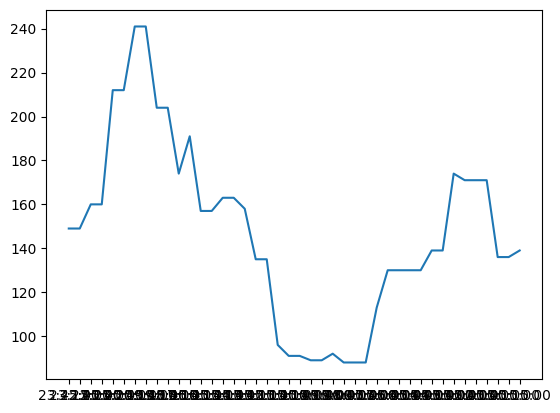

In [82]:
import matplotlib.pyplot as plt
plt.plot(x_list,y_list)

In [84]:
df = pd.read_csv('data.csv')
df[:15]
df.columns


Index(['locationId', 'value', 'latitude', 'longitude', 'date', 'time'], dtype='object')

In [85]:
df.shape

(9034, 6)

In [86]:
df

,locationId,value,latitude,longitude,date,time
0,8917,433.00,28.695381,77.181665,2021-11-07,00:00:00
1,7044,77.00,28.563262,77.186937,2021-11-07,00:00:00
2,6957,340.00,28.580280,77.233829,2021-11-07,00:00:00
3,6359,371.00,28.681174,77.302523,2021-11-07,00:00:00
4,8472,465.00,28.776200,77.051074,2021-11-07,00:00:00
...,...,...,...,...,...,...
9029,5610,147.29,28.657381,77.158545,2021-11-01,00:00:00
9030,6357,150.00,28.674045,77.131023,2021-11-01,00:00:00
9031,6358,129.00,28.636429,77.201067,2021-11-01,00:00:00
9032,7044,96.00,28.563262,77.186937,2021-11-01,00:00:00


In [98]:
X = df["latitude"],df["longitude"]

In [99]:
X = np.asarray(X)
X.shape

(2, 9034)

In [100]:
Y = np.asarray(df["value"])
Y.shape

(9034,)

In [101]:
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, Y) 

ValueError: Found input variables with inconsistent numbers of samples: [2, 9034]